<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-и-подготовка-данных" data-toc-modified-id="Знакомство-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>One-Hot Encoding</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Корреляции" data-toc-modified-id="Корреляции-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Корреляции</a></span></li><li><span><a href="#Подготовка-данных-к-обучению" data-toc-modified-id="Подготовка-данных-к-обучению-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовка данных к обучению</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Модели-с-дисбалансом-классов" data-toc-modified-id="Модели-с-дисбалансом-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модели с дисбалансом классов</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>SMOTE</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

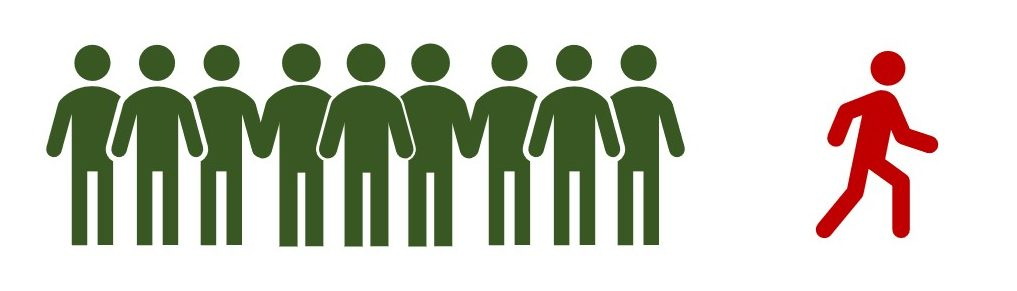

# Отток клиентов

**Цель**
* Спрогнозировать отток клиентов банка.

**Задача**
* Проанализировать исторические данные о поведении пользователей.
* Построить модель с `F1` метрикой не меньше 0,59.
* Дополнительно измерить значения `AUC-ROC`.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

*Признаки*
*	RowNumber — индекс строки в данных
*	CustomerId — уникальный идентификатор клиента
*	Surname — фамилия
*	CreditScore — кредитный рейтинг
*	Geography — страна проживания
*	Gender — пол
*	Age — возраст
*	Tenure — сколько лет человек является клиентом банка
*	Balance — баланс на счёте
*	NumOfProducts — количество продуктов банка, используемых клиентом
*	HasCrCard — наличие кредитной карты
*	IsActiveMember — активность клиента
*	EstimatedSalary — предполагаемая зарплата

**Целевой признак**
*	Exited — факт ухода клиента

## Знакомство и подготовка данных

In [120]:
import pandas as pd
#Установка формата отображения данных в таблицах
pd.options.display.float_format = '{:,.2f}'.format

import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

from sklearn.datasets import make_classification


In [5]:
#Откроем таблицу
churn = pd.read_csv('/datasets/Churn.csv')
сhurn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


In [6]:
#Объем данных
churn.shape

(10000, 14)

* Есть 10 тыс строк и 14 столбцов.
* Названия столбцов нужно перевести в нижний регистр и добавить разделить между словами
* Также переведем название пола клиентов к нижнему регистру

In [7]:
churn = churn.rename(columns ={'RowNumber': 'Row_Number', 'CustomerId': 'Customer_Id', 'CreditScore': 'Credit_Score', 
                        'NumOfProducts': 'Num_Of_Products', 'HasCrCard': 'Has_Cr_Card', 
                         'IsActiveMember' :'Is_Active_Member', 'EstimatedSalary' :'Estimated_Salary'})

In [8]:
#Перевод формата в нижний регистр
churn.columns = churn.columns.str.lower()

In [9]:
#Переведем название пола клиентов к нижнему регистру
churn['gender'] = churn['gender'].str.lower()
churn['gender'].unique()

array(['female', 'male'], dtype=object)

In [10]:
#Формат данных
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


* Колонку `tenure` необходимо перевести в формат `int`. Однако пока там видны пропуски. 
* В остальных колонках формат данных верный и соответствует действительности. 

In [11]:
#Объем пропусков
churn.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [12]:
# Процент пропусков
((churn.isna().sum())*100)/len(churn)

row_number         0.00
customer_id        0.00
surname            0.00
credit_score       0.00
geography          0.00
gender             0.00
age                0.00
tenure             9.09
balance            0.00
num_of_products    0.00
has_cr_card        0.00
is_active_member   0.00
estimated_salary   0.00
exited             0.00
dtype: float64

* tenure (сколько лет в банке) - единственный столбец имеет 909 пропусков, т.е. более 9% пропусков.
* Посмотрим есть ли связь пропусков с другими столбцами

In [13]:
#Влияет ли страна на пропуски?
#Сначала посмотрим на соотношения между странами во всей таблице, чтобы выявить закономерность по пропускам
churn['geography'].value_counts(normalize=True)

France    0.50
Germany   0.25
Spain     0.25
Name: geography, dtype: float64

In [14]:
#Проверим пропуски, в зависимости от страны.
churn.query('tenure.isna()')['geography'].value_counts(normalize=True)

France    0.51
Spain     0.25
Germany   0.24
Name: geography, dtype: float64

* Соотношение по странам сохранилось и после фильтрации по пропускам, значит страна не влияет на эти пропуски

In [15]:
#Влияет ли активность клиентов на пропуски?
#Сначала посмотрим на оригинальное соотношения , чтобы выявить закономерность по пропускам
churn['is_active_member'].value_counts(normalize=True)

1   0.52
0   0.48
Name: is_active_member, dtype: float64

In [16]:
#Проверим пропуски, в зависимости от активности клиентов
churn.query('tenure.isna()')['is_active_member'].value_counts(normalize=True)

1   0.51
0   0.49
Name: is_active_member, dtype: float64

* Соотношение по активности клиентов сохранилось и после фильтрации по пропускам, значит активность не влияет на эти пропуски

In [17]:
#Влияет ли наличие кредитной карты на пропуски?
#Сначала посмотрим на оригинальное соотношения , чтобы выявить закономерность по пропускам
churn['has_cr_card'].value_counts(normalize=True)

1   0.71
0   0.29
Name: has_cr_card, dtype: float64

In [18]:
churn.query('tenure.isna()')['has_cr_card'].value_counts(normalize=True)

1   0.71
0   0.29
Name: has_cr_card, dtype: float64

* Соотношение по наличию кредитной карты сохранилось и после фильтрации по пропускам, значит эта характеритика не влияет на эти пропуски

In [19]:
#Влияет ли количество продуктов банка у клиента на пропуски?
#Сначала посмотрим на оригинальное соотношения, чтобы выявить закономерность по пропускам
churn['num_of_products'].value_counts(normalize=True)

1   0.51
2   0.46
3   0.03
4   0.01
Name: num_of_products, dtype: float64

In [20]:
churn.query('tenure.isna()')['num_of_products'].value_counts(normalize=True)

1   0.51
2   0.45
3   0.04
4   0.00
Name: num_of_products, dtype: float64

* Не обнаружено зависимости между пропусками и поведением или местонахождением клиентов. 
* Показатель `tenure` может быть важным предиктором и пропуски в колонке не допустимы.
* К сожалению придётся удалить 9% данных, чтобы таблица имела равнозначные веса перед построением модели.

In [21]:
# Удалим пропуски в колонке tenure
churn.dropna(subset=['tenure'], inplace=True)

#Проверим на свойства элементов таблицы и наличие пропусков
churn.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [22]:
#Переведем формт данных в колонке tenure в int
churn['tenure'] = churn['tenure'].astype('int')
churn['tenure'].dtype

dtype('int32')

In [23]:
#Поиск дубликатов
churn.duplicated().sum()

0

* Автоматический поиск не выявил дубликатов

In [24]:
#Проверим новый объём таблицы
churn.shape

(9091, 14)

In [25]:
#Проверим уникальные значения в колонках категориальных переменных
col = ['geography', 'gender']
for i in col:
    print(churn[i].unique())


['France' 'Spain' 'Germany']
['female' 'male']


* Лишних значений нет, есть только уникальные значения без артефактов.
* Посмотрим на количество уникальных фамилий в таблице

In [26]:
print('Количество фамилий в таблице', churn['surname'].nunique())
print('Количество уникальных номеров клиентов в таблице', churn['customer_id'].nunique())

Количество фамилий в таблице 2787
Количество уникальных номеров клиентов в таблице 9091


* Количество фамилий, вероятно, совпадает между клиентами
* Однако количество количество уникальных номеров клиентов совпадает с количеством строк таблицы.

### One-Hot Encoding

In [27]:
churn.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,female,43,2,"125,510.82",1,1,1,"79,084.10",0


* Применим технику прямого кодирования для создания дамми-переменных.
* В качестве переменных для кодирования выберем `gender`,`geography`, `has_cr_card`, `is_active_member`.
* Однако также уберем из таблицы `surname`, `row_number` и `customer_id`, т.к. эти случайные номера не понадобяться для предсказания модели. 

In [28]:
churn_ohe = churn.drop(['row_number', 'customer_id', 'surname'], axis = 1)

#Посмотрим на колонки в таблице
churn_ohe.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

In [29]:
#Создадим дамми переменные для колонок 'gender','geography'
churn_ohe = pd.get_dummies(churn_ohe, columns= ['gender','geography'],
                           prefix=['gender','geography'],
                           drop_first=True)

In [30]:
#Выведем отлкик 'exited' вначале таблицы
churn_ohe.columns


Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'exited',
       'gender_male', 'geography_Germany', 'geography_Spain'],
      dtype='object')

In [31]:
#Колонки таблицы
col = ['exited', 'credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'estimated_salary',  'gender_male', 'geography_Germany',
       'geography_Spain', 'has_cr_card', 'is_active_member']

In [32]:
#Выведем отлкик 'exited' вначале таблицы 
churn_ohe = churn_ohe.reindex(columns=col)

#Посмотрим на новую таблицу churn_ohe с dummy переменными
churn_ohe.head()

,exited,credit_score,age,tenure,balance,num_of_products,estimated_salary,gender_male,geography_Germany,geography_Spain,has_cr_card,is_active_member
0,1,619,42,2,0.00,1,"101,348.88",0,0,0,1,1
1,0,608,41,1,"83,807.86",1,"112,542.58",0,0,1,0,1
2,1,502,42,8,"159,660.80",3,"113,931.57",0,0,0,1,0
3,0,699,39,1,0.00,2,"93,826.63",0,0,0,0,0
4,0,850,43,2,"125,510.82",1,"79,084.10",0,0,1,1,1


In [33]:
churn_ohe.shape

(9091, 12)

* Новая таблица содержит 11 переменных для предсказания отклика.

### Вывод
* Первоначальный объем таблицы содержал 10 тыс строк и 14 столбцов.
* Названия колонок переведены в нижний регистр и добавлены разделители между словами.
* Значения колонки `gender` переведены к нижнему регистру.
* Было обнаружено 9% пропусков в колонке `tenure`. Последующий анализ не выявил закономерности в пропусках. Было принято решение удалить пропуски для подготовки равновесных переменных перед обучением модели. Оставшиеся 9091 строк должно хватить для последующего предсказания модели.
* Формат колонки `tenure` переведен в формат `int`.
* Создана новая таблица `churn_ohe`, которая хранит данные прямого кодирования переменных.
* Данные подготовлены к началу исследовательского анализа.

## Анализ данных

* Посмотрим на классы отклика и баланс между классами

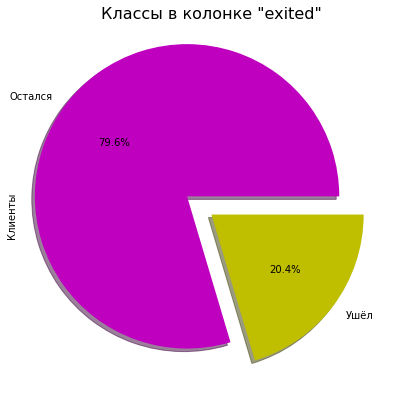

In [34]:
# Целевой признак exited. 
plt.figure(figsize=(7,7))
myexplode = [0.2, 0]
mycolors = ['m', 'y']
labels = ['Остался', 'Ушёл']
(churn.
 groupby('exited')['customer_id']
 .count()
 .plot(kind='pie', 
       labels = labels,
       explode=myexplode,
       shadow = True,
       colors=mycolors,
       autopct='%1.1f%%'))

plt.title('Классы в колонке "exited"', fontsize=16)
plt.ylabel('Клиенты')

plt.show()

* Выявлено 2 класса. 
* Заметен явный дисбаланс классов в пользу оставшихся клиентов. 
* Ушедших клиентов 20.4%.

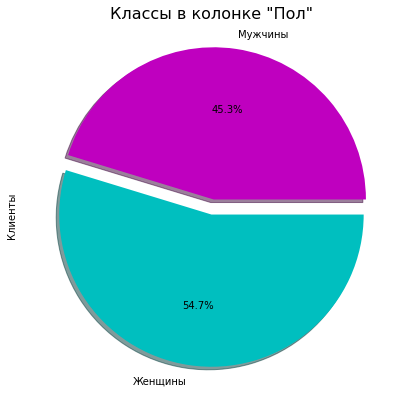

In [35]:
# Посмотрим на распределение по полу
plt.figure(figsize=(7,7))
myexplode = [0.1, 0]
mycolors = ['m', 'c']
labels = ['Мужчины', 'Женщины']
(churn.
 groupby('gender')['customer_id']
 .count()
 .plot(kind='pie', labels = labels, 
       explode=myexplode, 
       shadow = True, 
       colors=mycolors, 
       autopct='%1.1f%%'))

plt.title('Классы в колонке "Пол"', fontsize=16)
plt.ylabel('Клиенты')

plt.show()

* Мужчин в выборке больше, но незначительно

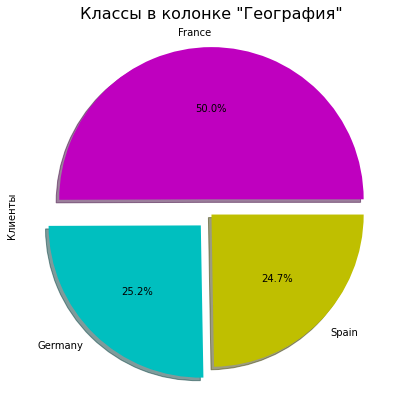

In [36]:
# Посмотрим на распределение по географии клиентов
plt.figure(figsize=(7,7))
myexplode = [0.1, 0.1, 0]
mycolors = ['m', 'c', 'y']

(churn.
 groupby('geography')['customer_id']
 .count()
 .plot(kind='pie', 
       explode=myexplode, 
       shadow = True, 
       colors=mycolors, 
       autopct='%1.1f%%'))

plt.title('Классы в колонке "География"', fontsize=16)
plt.ylabel('Клиенты')

plt.show()

* Большая часть клиентов из Франции, а из Испании и Германии по 1/4 клиентов. 
* Посмотрим на распределения количественных переменных в зависимости от пола.

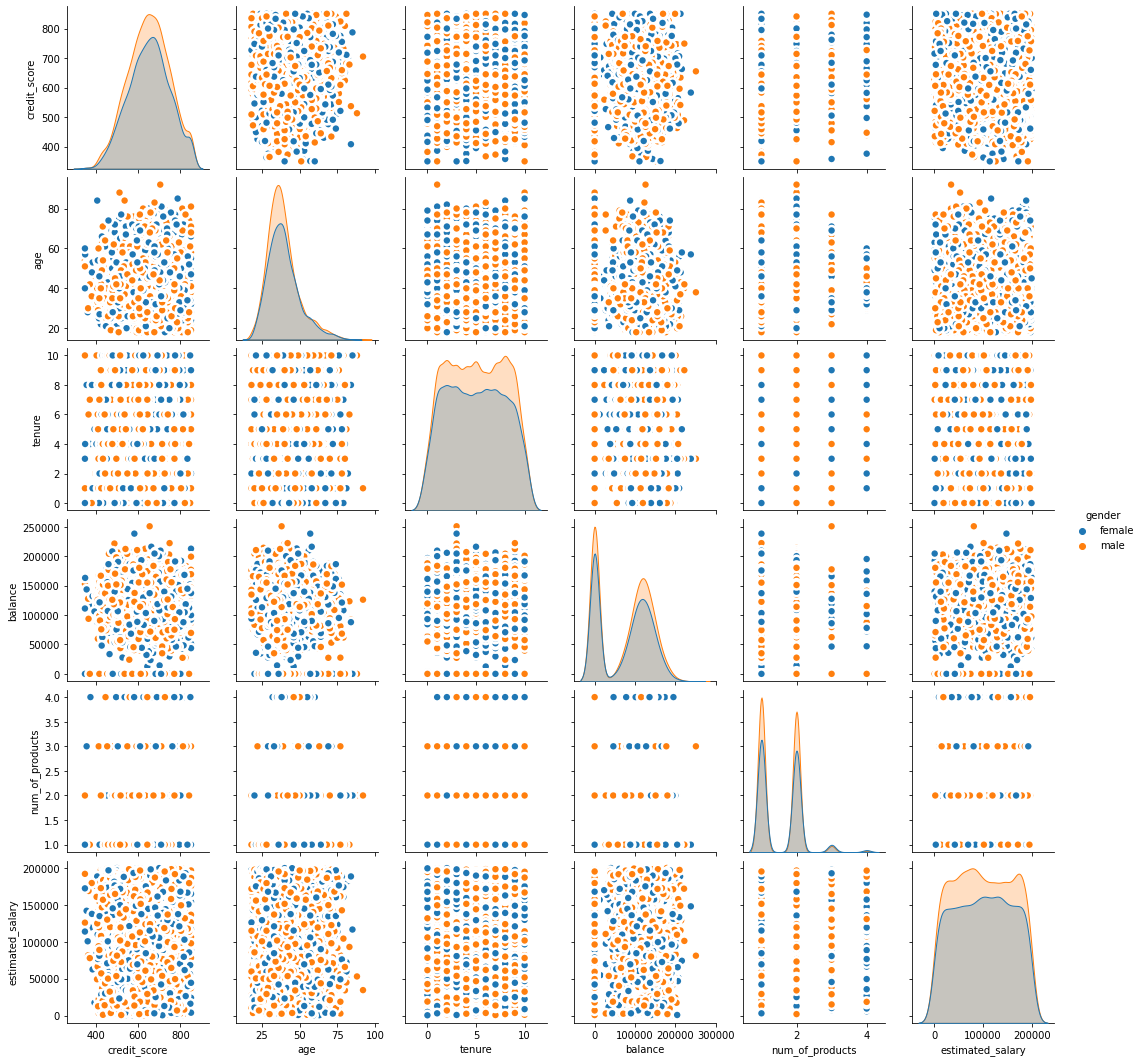

In [37]:
col = ['gender', 'credit_score', 'age', 'tenure', 'balance', 'num_of_products','estimated_salary']
sns.pairplot(churn[col], 
             hue='gender',
             kind="scatter",
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

* Различий в распределениях между полами обнаружено не было. У мужчин и женщин встречается схожие распределения по всем признакам, однако частота встречаемости выше у мужчин.


### Корреляции

* Построим корреляционную матрицу между всеми количественными признаками, а также отдельно между откликом и количественными/качественными признаками.

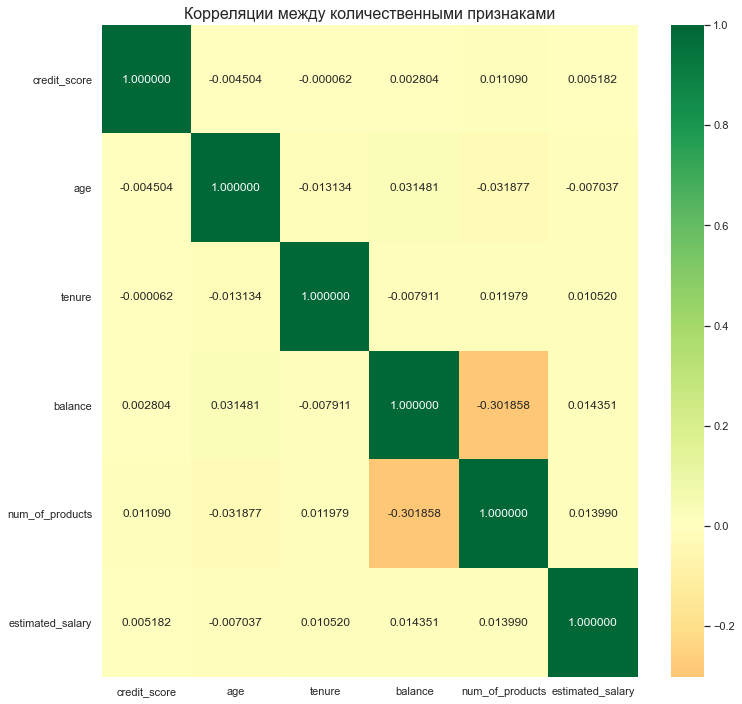

In [38]:
#Корреляции между количественными признаками
sns.set(rc={'figure.figsize':(12,12)})

numeric_col = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products','estimated_salary']

ax = sns.heatmap(churn_ohe[numeric_col].corr(), 
            cmap='RdYlGn',
            center=0,
            fmt='f',     
            annot=True)

ax.set_title('Корреляции между количественными признаками', fontsize=16)
plt.yticks(rotation=0) 
plt.show()

* Все количественные предикторы не коррелируют друг с другом.
* Единственная слабая отрицательная связь была показана между количеством продуктов в банке и балансом.
* Проверим теперь корреляции отклика и качественных переменных методом `chi2_contingency`.

In [39]:
# Создадим функцию для подсчёта корреляции, которая на выходе будет показывать значения Chi2 и p.
def chi2(col):
    chi = chi2_contingency(pd.crosstab(churn_ohe['exited'], churn_ohe[col]))[0]
    p = chi2_contingency(pd.crosstab(churn_ohe['exited'], churn_ohe[col]))[1]
    return pd.DataFrame([chi, p], index=['Chi2', 'p'], columns=[col])

In [40]:
#Расчитаем chi2_contingency для отклика и качественных переменных
chi2('geography_Germany')\
.merge(chi2('geography_Spain'), left_index=True, right_index=True)\
.merge(chi2('has_cr_card'), left_index=True, right_index=True)\
.merge(chi2('is_active_member'), left_index=True, right_index=True)


,geography_Germany,geography_Spain,has_cr_card,is_active_member
Chi2,287.45,28.16,0.24,217.82
p,0.00,0.00,0.63,0.00


* Все качественные переменные достоверно коррелировали с откликом, кроме предиктора `has_cr_card`.
* Теперь посчитаем корреляции отлкика с количественными переменными, используя метод `pointbiserialr`.

In [41]:
# Корреляции отлкика и количественных переменных
numeric_col = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
churn_ohe[numeric_col].corrwith(churn_ohe['exited'].astype('float'), method=stats.pointbiserialr)


,credit_score,age,tenure,balance,num_of_products,estimated_salary
0,-0.02,0.28,-0.02,0.12,-0.05,0.02
1,0.02,0.00,0.11,0.00,0.00,0.13


* Показатель `age` имеет достоверную положительную связь с откликом и может вносить вклад в предсказание модели.

### Подготовка данных к обучению

* Разделим выборку на три части - тренировочную, валидационную и тестовую для окончательного тестирования лучшей модели.

In [42]:
target = churn_ohe['exited'] # целевой признак
features = churn_ohe.drop(['exited'], axis=1) # признаки для предсказания модели

In [43]:
#Выделим сначала 40% на валидационную и тестовую выборки.
features_train, features_rem, target_train, target_rem = train_test_split(features, target, 
                                                                          test_size=0.4,
                                                                          stratify=target,
                                                                         random_state=12345)

In [44]:
features_valid, features_test, target_valid, target_test = train_test_split(features_rem, target_rem,
                                                                           test_size=0.5,
                                                                           stratify=target_rem,
                                                                           random_state=12345)

In [45]:
print('объем обучающей выборки:', features_train.shape) 
print('доля обучающей выборки:', round(features_train.shape[0]/churn_ohe.shape[0], 1)*100,'%')
print('объем валидационной выборки:', features_valid.shape) 
print('объем тестовой выборки:', features_test.shape)

объем обучающей выборки: (5454, 11)
доля обучающей выборки: 60.0 %
объем валидационной выборки: (1818, 11)
объем тестовой выборки: (1819, 11)


In [46]:
display('Баланс классов тренировочной выборки', target_train.value_counts(normalize=True))
display('Баланс классов валидационной выборки',target_valid.value_counts(normalize=True))
display('Баланс классов тестовой выборки', target_test.value_counts(normalize=True))

'Баланс классов тренировочной выборки'

0   0.80
1   0.20
Name: exited, dtype: float64

'Баланс классов валидационной выборки'

0   0.80
1   0.20
Name: exited, dtype: float64

'Баланс классов тестовой выборки'

0   0.80
1   0.20
Name: exited, dtype: float64

 **Данные разделены на следующие выборки**

* обучающую (60%) - `features_train`, `target_train`,
* валидационную (20%) - `features_valid`, `target_valid`
* тестовую (20%) - `features_test`, `target_test`.
* Дисбаланс классов сохранен во всех выборках 80%/20%.

**Z-score**
* Необходимо провести стандартизацию количественных переменных, т.к. данные находятся в разных измерительных масштабах.

In [47]:
features.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'estimated_salary', 'gender_male', 'geography_Germany',
       'geography_Spain', 'has_cr_card', 'is_active_member'],
      dtype='object')

In [48]:
features.head()

,credit_score,age,tenure,balance,num_of_products,estimated_salary,gender_male,geography_Germany,geography_Spain,has_cr_card,is_active_member
0,619,42,2,0.00,1,"101,348.88",0,0,0,1,1
1,608,41,1,"83,807.86",1,"112,542.58",0,0,1,0,1
2,502,42,8,"159,660.80",3,"113,931.57",0,0,0,1,0
3,699,39,1,0.00,2,"93,826.63",0,0,0,0,0
4,850,43,2,"125,510.82",1,"79,084.10",0,0,1,1,1


In [49]:
#Список количественных переменных
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products','estimated_salary']

In [50]:
#Стандартизация количественных features_train, features_valid, target_valid, features_test
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [51]:
#Проверим как прошла стандартизация количественных признаков
features_train.head()

,credit_score,age,tenure,balance,num_of_products,estimated_salary,gender_male,geography_Germany,geography_Spain,has_cr_card,is_active_member
9723,-1.29,-0.66,0.69,0.79,-0.91,-0.22,1,0,0,0,0
1224,-1.56,0.78,1.03,0.83,-0.91,1.38,0,0,1,1,0
8377,1.58,0.11,-0.36,-1.22,0.79,-0.31,1,0,1,1,1
8014,0.84,0.01,-1.05,0.81,-0.91,-0.43,0,0,1,1,1
2491,-0.40,-1.24,-0.36,-1.22,0.79,1.39,0,0,1,1,1


* Стандартизация количественных признаков прошла успешно.

### Вывод

* Количественные признаки стандартизированы
* Качественные переменные переведены в дамми-переменные.
* Данные подготовлены для построения модели. 


## Обучение моделей
### Модели с дисбалансом классов


#### LogisticRegression

* Построим для примера логистическую модель, чтобы посмотреть на уровень предсказания модели с дисбалансом классов.

In [52]:
%%time
modelLG0 = LogisticRegression(random_state=12345, solver='liblinear')
modelLG0.fit(features_train, target_train)
predicted_valid = modelLG0.predict(features_valid)
print('F1_score:', f1_score(target_valid, predicted_valid))

probabilities_valid = modelLG0.predict_proba(features_valid) #вероятности  получения 0 и 1
probabilities_one_valid = probabilities_valid[:, 1] #вероятности  получения 1

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)


F1_score: 0.3306772908366534
AUC-ROC: 0.7893010355098474
CPU times: total: 15.6 ms
Wall time: 15 ms


In [53]:
#Посмотрим отдельно на все показатели оценки точности модели
print(metrics.classification_report(target_valid, predicted_valid, labels=modelLG0.classes_))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1447
           1       0.63      0.22      0.33       371

    accuracy                           0.82      1818
   macro avg       0.73      0.60      0.61      1818
weighted avg       0.79      0.82      0.78      1818



* Модель без учета баланса классов показывает низкие предсказания по отношению к меньшему классу. F1-score для класса 1 лишь 0,33, а в идеале должно быть 1.
* Площадь под кривой AUC-ROC составила 0.79.

#### DecisionTreeClassifier

In [54]:
%%time
for depth in range(1,6):
                model_DT0 = DecisionTreeClassifier(random_state=12345, 
                                           max_depth=depth)
                
                model_DT0.fit(features_train, target_train)
                predicted_valid = model_DT0.predict(features_valid)
                print(depth,'F1_score:', f1_score(target_valid, predicted_valid))
                
                probabilities_valid = model_DT0.predict_proba(features_valid) #вероятности  получения 0 и 1

                probabilities_one_valid = probabilities_valid[:, 1] #вероятности  получения 1
                auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
                print('AUC-ROC:', auc_roc)

1 F1_score: 0.0
AUC-ROC: 0.6743788151710854
2 F1_score: 0.5240464344941957
AUC-ROC: 0.7304023381398823
3 F1_score: 0.5208681135225375
AUC-ROC: 0.7871290540704161
4 F1_score: 0.5127272727272727
AUC-ROC: 0.8113524216847945
5 F1_score: 0.5733788395904437
AUC-ROC: 0.8450470068195747
CPU times: total: 78.1 ms
Wall time: 55.8 ms


In [55]:
model_DT0 = DecisionTreeClassifier(random_state=12345, 
                                           max_depth=5)
model_DT0.fit(features_train, target_train)
predicted_valid = model_DT0.predict(features_valid)

In [56]:
#Посмотрим отдельно на все показатели оценки точности модели
print(metrics.classification_report(target_valid, predicted_valid, labels=model_DT0.classes_))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1447
           1       0.78      0.45      0.57       371

    accuracy                           0.86      1818
   macro avg       0.83      0.71      0.75      1818
weighted avg       0.85      0.86      0.85      1818



* Модель Обучающего дерева без учета баланса классов показывает более высокие оценки предсказания, чем Логистическая модель. F1-score для класса 1 составило 0,57 для глубины дерева 5.
* Также заметно, что меньший класс модель предсказывает хуже.
* AUC-ROC для этой модели выше, чем для логистической и составляет 0.85.

#### RandomForestClassifier

In [57]:
%%time
# Обучим модель c 20 деревьями
Depths = []
F1 = []
AUC_ROC = []
for depth in range(1,20, 1):
        model_RF0 = RandomForestClassifier(random_state=12345,
                                           max_depth=depth, 
                                           n_estimators=20)  
        
        model_RF0.fit(features_train, target_train)
        
        predicted_valid = model_RF0.predict(features_valid) 
      
        probabilities_valid = model_RF0.predict_proba(features_valid) #вероятности  получения 0 и 1

        probabilities_one_valid = probabilities_valid[:, 1] #вероятности  получения 1
                
        Depths.append(depth)
        F1.append(f1_score(target_valid, predicted_valid))
        AUC_ROC.append(roc_auc_score(target_valid, probabilities_one_valid))
        
    

CPU times: total: 1.48 s
Wall time: 1.48 s


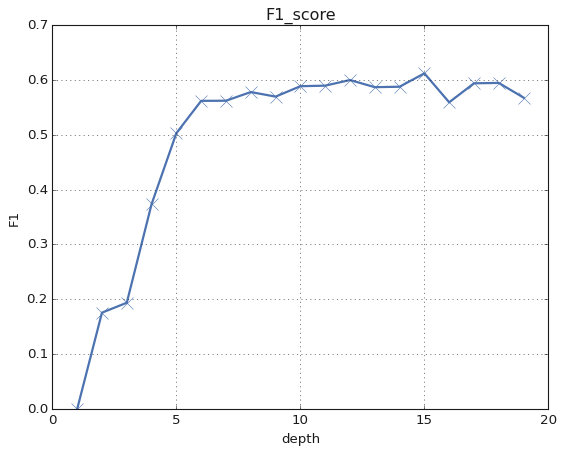

In [58]:
# Построим график для F1       
plt.style.use('classic')
plt.figure(figsize=(8,6), facecolor='white')
plt.plot(Depths, F1, 'bx-', markersize=10, linewidth=2)
plt.title('F1_score')
plt.xlabel('depth')
plt.ylabel('F1')
plt.grid()
plt.show()    

* Лучшее значение `F1` отображается на глубины 15, однако между 10-15 разница не заметна.

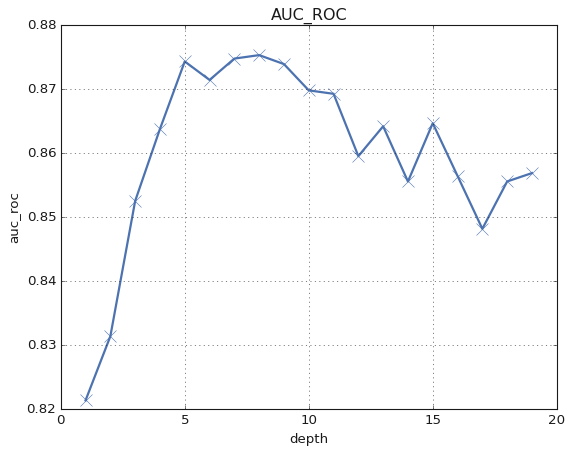

In [59]:
# Построим график для AUC-ROC       
plt.style.use('classic')
plt.figure(figsize=(8,6), facecolor='white')
plt.plot(Depths, AUC_ROC, 'bx-', markersize=10, linewidth=2)
plt.title('AUC_ROC')
plt.xlabel('depth')
plt.ylabel('auc_roc')
plt.grid()
plt.show()

* Самое высокое значение `AUC-ROC` показано для глубины 7. Однако предпочтение нужно отдавать для `F1` метрики, поэтому соблюдем баланс и выберем глубину 10 для последующего построения модели.

In [61]:
#Постоим модель
model_RF_0 = RandomForestClassifier(n_estimators=20,
                                    max_depth=10,                                   
                                   random_state=12345) 

model_RF_0.fit(features_train, target_train)
predicted_valid = model_RF_0.predict(features_valid)

In [63]:
#Посмотрим отдельно на все показатели оценки точности модели
print(metrics.classification_report(target_valid, predicted_valid, labels=model_RF_0.classes_))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1447
           1       0.80      0.47      0.59       371

    accuracy                           0.87      1818
   macro avg       0.84      0.72      0.75      1818
weighted avg       0.86      0.87      0.85      1818



* Модель случайного дерева для 20 деревьев и глубины дерева 10 показывает наивысшую из 3-х моделей оценку f1-score: 0.59. 
* AUC-ROC выше, чем у всех предыдуших моделей Лoгистической регрессии и Решающего дерева. Она составила 0.87.

#### Вывод
* Модель без учета баланса классов показывает низкие предсказания по отношению к меньшему классу. 
* Самые низкие показатели были у логистической регрессии, в то время как модель Случайного леса показывала более высокие показатели F1-score.
* Необходимо сбалансировать классы, переобучить модели.

### Борьба с дисбалансом

* Далее будем строить три основные модели классификации и улучшать их качество.
* Начнём улучшать качества первой модели логистической регрессии и начнем с самого простого способа - взвешивание классов.

#### Logistic Regression

In [64]:
%%time
model_LR1 = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_LR1.fit(features_train, target_train)
predicted_valid = model_LR1.predict(features_valid)
print('F1_score:', f1_score(target_valid, predicted_valid))


probabilities_valid = model_LR1.predict_proba(features_valid) #вероятности  получения 0 и 1
probabilities_one_valid = probabilities_valid[:, 1] #вероятности  получения 1

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)


F1_score: 0.5065420560747663
AUC-ROC: 0.790763304317698
CPU times: total: 15.6 ms
Wall time: 15.9 ms


* После баланса классов точность предсказания модели выросла с 0,33 до 0,51. При этом площадь под кривой auc_roc далека до 1 и составляет 0,79.

* Теперь используем технику upsampling для искуственного увеличения меньшего класса выборки и посмотрим на качество модели.

In [65]:
#Создадим функцию для применения upsampling метод

def upsample(features, target, repeat):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones]*repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

* Класс 1 был 20,4%, а класс 0 был 79,6%. Значит дисбаланс между классами 4 раза. Будет увеличить размер меньшего класса в 4 раза.

In [66]:
#Проверим баланс между классами
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
target_upsampled.value_counts()


1    4448
0    4342
Name: exited, dtype: int64

* Объемы выборки стали равновесными. Можно обучать модель.

In [67]:
%%time
# Обучим модель, где будет дублирование меньшего класса в 4 раза
model_LR2 = LogisticRegression(solver='liblinear', random_state=12345)
model_LR2.fit(features_upsampled, target_upsampled)
predicted_valid = model_LR2.predict(features_valid)
print('F1_score:', f1_score(target_valid, predicted_valid))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

F1_score: 0.5050878815911193
AUC-ROC: 0.790763304317698
CPU times: total: 31.2 ms
Wall time: 17 ms


* После использования метода `upsampling` значения точности модели и площади под кривой практически не изменились. 

#### DecisionTreeClassifier

* Построим новую модель другого класса - DecisionTreeClassifier

In [68]:
parametrs = {'criterion': ['gini', 'entropy'],
             'max_depth': range(1, 6, 1),
             'min_samples_split': range(2,10,1),
             'min_samples_leaf': range(1,10,1),
                         }

In [69]:
%%time

model_DT1 = DecisionTreeClassifier(class_weight='balanced', random_state=12345)

grid = GridSearchCV(model_DT1,
                    parametrs, 
                    cv=5, 
                    scoring='f1')

grid.fit(features_train, target_train)

grid.best_params_


CPU times: total: 28.5 s
Wall time: 28.6 s


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [70]:
%%time
model_DT1 = grid.best_estimator_

model_DT1.fit(features_train, target_train)

predicted_valid = model_DT1.predict(features_valid)
print('F1_score:', f1_score(target_valid, predicted_valid))
                
probabilities_valid = model_DT1.predict_proba(features_valid) #вероятности  получения 0 и 1

probabilities_one_valid = probabilities_valid[:, 1] #вероятности  получения 1
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

F1_score: 0.5705882352941176
AUC-ROC: 0.8457688274094372
CPU times: total: 15.6 ms
Wall time: 16 ms


* Модель `DecisionTreeClassifier` при взвешивании классов даёт схожие оценки как и при дисбалансе классов.

**Модель 2 для Решающего дерева**.
* Применим снова метод `upsampling` и построим новую модель решающего дерева.

In [71]:
%%time
parametrs = {'criterion': ['gini', 'entropy'],
             'max_depth': range(1, 6, 1),
             'min_samples_split': range(2,10,1),
             'min_samples_leaf': range(1,10,1),
                         }

model_DT2 = DecisionTreeClassifier(random_state=12345)

grid2 = GridSearchCV(model_DT2,
                    parametrs, 
                    cv=5, 
                    scoring='f1')

grid2.fit(features_upsampled, target_upsampled)

grid2.best_params_

CPU times: total: 33.9 s
Wall time: 33.9 s


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [72]:
%%time
model_DT2 = grid2.best_estimator_

model_DT2.fit(features_upsampled, target_upsampled)

predicted_valid = model_DT2.predict(features_valid)
print('F1_score:', f1_score(target_valid, predicted_valid))
                
probabilities_valid = model_DT2.predict_proba(features_valid) #вероятности  получения 0 и 1

probabilities_one_valid = probabilities_valid[:, 1] #вероятности  получения 1
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

F1_score: 0.5711481844946025
AUC-ROC: 0.8466415317871161
CPU times: total: 15.6 ms
Wall time: 18.9 ms


* После применения метода `upsampling` предсказание модели Решающего дерева не изменилось.

#### RandomForestClassifier

* Используем `balanced` для баланса классов.

In [73]:
%%time
parametrs = {'max_depth': range(1, 16, 1),
             'n_estimators': range(20, 200, 20)
            }

model_RF_1 = RandomForestClassifier(class_weight='balanced', random_state=12345)

grid_rf_1 = GridSearchCV(model_RF_1,
                    parametrs, 
                    cv=3, 
                    scoring='f1'
                    )

grid_rf_1.fit(features_train, target_train)

grid_rf_1.best_params_

CPU times: total: 1min 39s
Wall time: 1min 39s


{'max_depth': 9, 'n_estimators': 160}

In [74]:
%%time
model_RF_1 = grid_rf_1.best_estimator_

model_RF_1.fit(features_train, target_train)

predicted_valid = model_RF_1.predict(features_valid)
print('F1_score:', f1_score(target_valid, predicted_valid))
                
probabilities_valid = model_RF_1.predict_proba(features_valid) #вероятности  получения 0 и 1

probabilities_one_valid = probabilities_valid[:, 1] #вероятности  получения 1
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

F1_score: 0.6361323155216285
AUC-ROC: 0.8773724612871319
CPU times: total: 594 ms
Wall time: 605 ms


* Максимальные показатели для F1_score: 0.64 и AUC-ROC:0.88, что выше, чем для предыдуших моделей.
* Теперь используем технику `upsampling`.

In [76]:
%%time
# upsampling
parametrs = {'max_depth': range(1, 16, 1),
             'n_estimators': range(20, 200, 20)
            }

model_RF_2 = RandomForestClassifier(random_state=12345)

grid_rf_2 = GridSearchCV(model_RF_2,
                    parametrs, 
                    cv=3, 
                    scoring='f1'
                    )

grid_rf_2.fit(features_upsampled, target_upsampled)

grid_rf_2.best_params_

CPU times: total: 2min 16s
Wall time: 2min 16s


{'max_depth': 15, 'n_estimators': 140}

In [77]:
%%time
model_RF_2 = grid_rf_2.best_estimator_

model_RF_2.fit(features_upsampled, target_upsampled)

predicted_valid = model_RF_2.predict(features_valid)
print('F1_score:', f1_score(target_valid, predicted_valid))
                
probabilities_valid = model_RF_2.predict_proba(features_valid) #вероятности  получения 0 и 1

probabilities_one_valid = probabilities_valid[:, 1] #вероятности  получения 1
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

F1_score: 0.6321678321678321
AUC-ROC: 0.8668087333771706
CPU times: total: 984 ms
Wall time: 992 ms


* Техника `balanced` и `upsampling` приводить к схожим результатам, выше, чем при дисбалансе классов. 
* Однако при использовании `upsampling` метрика `F1` была немного ниже, чем при  `balanced`.

#### SMOTE

* Опробуем последний вариант борьбы с дисбалансом классов.
* Применим метод `SMOTE` для синтетического увеличения размеров меньшего класса.

In [78]:
#Увеличим класс 1 методом SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=12345)
features_sm, target_sm = smote.fit_resample(features_train, target_train)


In [79]:
# Посмотрим на баланс классов
target_sm.value_counts()

0    4342
1    4342
Name: exited, dtype: int64

* Теперь выборка сбалансирована.
* Обучим новую модель RandomForest.

In [82]:
%%time
# SMOTE
parametrs = {'max_depth': range(1, 16, 1),
             'n_estimators': range(20, 200, 20)
            }

model_RF_3 = RandomForestClassifier(random_state=12345)

grid_rf_3 = GridSearchCV(model_RF_3,
                    parametrs, 
                    cv=3, 
                    scoring='f1'
                    )

grid_rf_3.fit(features_sm, target_sm)

grid_rf_3.best_params_

CPU times: total: 2min 26s
Wall time: 2min 26s


{'max_depth': 15, 'n_estimators': 120}

In [83]:
%%time
model_RF_3 = grid_rf_3.best_estimator_

model_RF_3.fit(features_sm, target_sm)

predicted_valid = model_RF_3.predict(features_valid)
print('F1_score:', f1_score(target_valid, predicted_valid))
                
probabilities_valid = model_RF_3.predict_proba(features_valid) #вероятности  получения 0 и 1

probabilities_one_valid = probabilities_valid[:, 1] #вероятности  получения 1
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

F1_score: 0.608695652173913
AUC-ROC: 0.861630252758286
CPU times: total: 891 ms
Wall time: 888 ms


* Техника `SMOTE` не привела к росту метрики `F1`.
* Посмотрим на ROC-кривую для лучшей модели.

In [ ]:
%%time

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

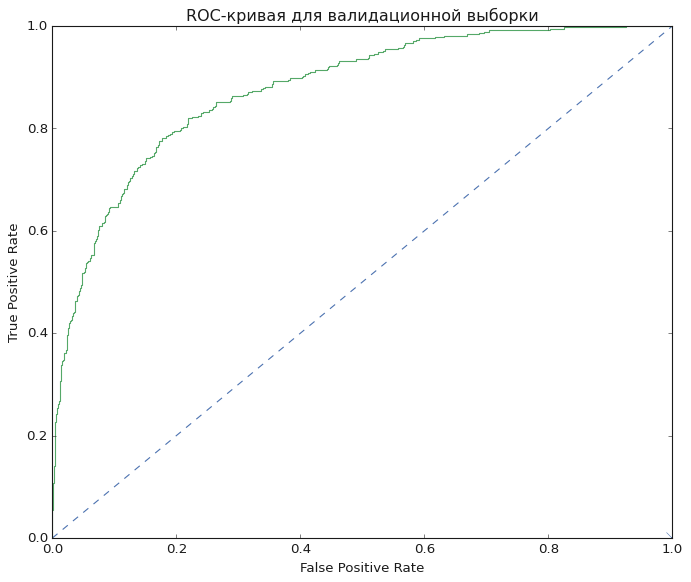

In [85]:
model_RF_1 = grid_rf_1.best_estimator_

model_RF_1.fit(features_train, target_train)
               
probabilities_valid = model_RF_1.predict_proba(features_valid) #вероятности  получения 0 и 1

probabilities_one_valid = probabilities_valid[:, 1] #вероятности  получения 1




fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)


plt.style.use('classic')
plt.figure(figsize=(10,8), facecolor='white')
plt.plot(Depths, F1, 'bx-', markersize=10, linewidth=2)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

#Построим график
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для валидационной выборки')

plt.show()


#### Вывод
* Синтетическое увеличение меньшего класса привело к существенному росту точности предсказания модели.
* Модель выглядит лучше, чем случайная модель.

## Тестирование модели

In [87]:
# Проведем тестирование модели
predicted_test = model_RF_1.predict(features_test)
print('F1_score:', f1_score(target_test, predicted_test))
        
probabilities_test = model_RF_1.predict_proba(features_test) #вероятности  получения 0 и 1
probabilities_one_test = probabilities_test[:, 1] #вероятности  получения 1
                
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC:', auc_roc)

F1_score: 0.6021220159151193
AUC-ROC: 0.8532672633318938


* Точность предсказания на тестовой выборке ниже, чем на валидационной, однако выше заявленной 0,59.
* Построим график `roc-auc` кривой.

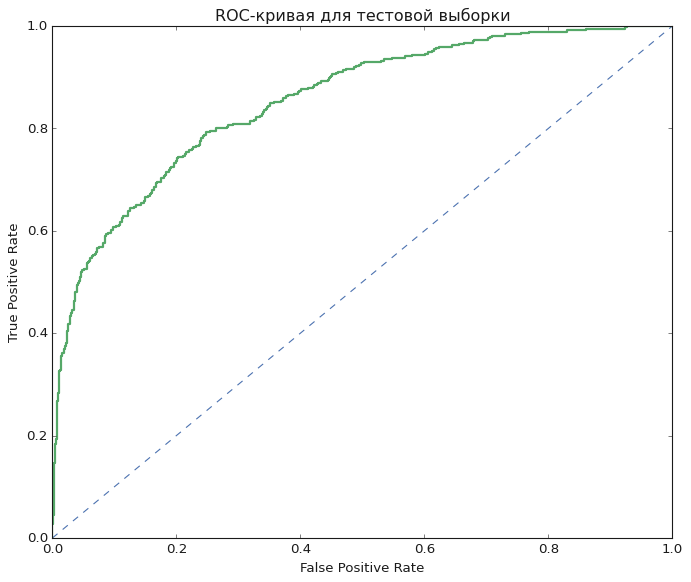

In [90]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)


plt.style.use('classic')
plt.figure(figsize=(10,8), facecolor='white')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

#Построим график
plt.plot(fpr, tpr, linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для тестовой выборки')

plt.show()

* Посмотрим какие факторы внесли наибольший вес в предсказание модели.

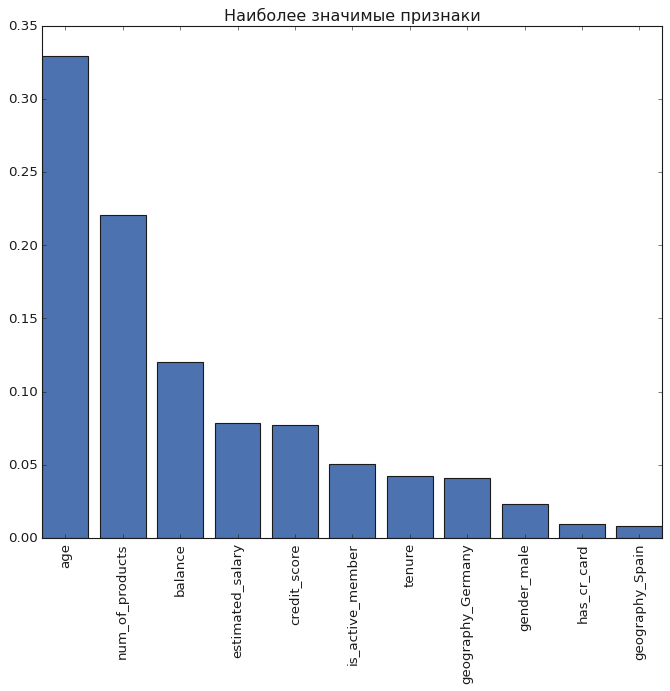

In [119]:
importances = model_RF_1.feature_importances_
feature_names = features_train.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.style.use('classic')
plt.figure(figsize=(10,8), facecolor='white')

plt.style.use('classic')
plt.bar(list(forest_importances.keys()), list(forest_importances.values) )
plt.title("Наиболее значимые признаки")

plt.xticks(rotation=90) 
plt.show()

* В целом, вклад по убыванию топ 5 факторов - возраст, количество продуктов, баланс, зарплата, кредитный рейтинг.

## Вывод
* Проведен анализ данных оттока клиентов банка.
* При анализе данных был выявлен дисбаланс классов.
* Было выбрано оптимальное решение для борьбы с дисбалансом - баланс классов.
* Выбрана лучшая модель - RandomForestClassifier.
* Наибольшее значение на предсказание модели оказал возраст клиента, количество продуктов в банке и баланс на счёте клиента. 
* Достигнут уровень точности предсказания метрики `F1` 0,60, при площади под кривой равной более 0,85.